# Minería de Datos: Evaluación 2




## Importar librerías

In [1]:
import pandas as pd
import urllib.request
import zipfile
import tempfile

## Descarga de datos

### Especificar la URL del archivo zip que contiene la base de datos

In [2]:
STATA_zip_url = 'https://observatorio.ministeriodesarrollosocial.gob.cl/storage/docs/casen/2022/Base%20de%20datos%20Casen%202022%20STATA_18%20marzo%202024.dta.zip'

### Especificar el nombre de los archivos a extraer

In [3]:
STATA_file_name = 'Base de datos Casen 2022 STATA_18 marzo 2024.dta'

### Descargar los archivos

#### Crear archivos temporales

In [4]:
STATA_temp_file = tempfile.NamedTemporaryFile(delete=False)
STATA_zip_name = STATA_temp_file.name

#### Descargar datos

In [5]:
urllib.request.urlretrieve(STATA_zip_url, STATA_zip_name)

('/tmp/tmpt2o0mqbg', <http.client.HTTPMessage at 0x7eb44b604460>)

### Usar STATA_file_name para extaer los datos del archivo zip temporal

In [6]:
with zipfile.ZipFile(STATA_zip_name, 'r') as zip_ref:
    zip_ref.extract(STATA_file_name)

### Leer los datos extraidos

In [7]:
data_STATA = pd.read_stata(STATA_file_name, convert_categoricals=False)

<ipython-input-7-946cbd5b3a7b>:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  data_STATA = pd.read_stata(STATA_file_name, convert_categoricals=False)


In [8]:
data_STATA.shape, data_STATA.head()

((202231, 918),
    id_vivienda      folio  id_persona  region  area  cod_upm  nse  estrato  \
 0      1000901  100090101           1      16     2    10009    4  1630324   
 1      1000901  100090101           2      16     2    10009    4  1630324   
 2      1000901  100090101           3      16     2    10009    4  1630324   
 3      1000902  100090201           1      16     2    10009    4  1630324   
 4      1000902  100090201           2      16     2    10009    4  1630324   
 
    hogar  expr  ...  men18c  may60c  tipohogar tot_hog  ind_hacina  indsan  \
 0      1    43  ...       0       1          3       1           1       1   
 1      1    43  ...       0       1          3       1           1       1   
 2      1    44  ...       0       1          3       1           1       1   
 3      1    51  ...       1       1          5       1           1       2   
 4      1    51  ...       1       1          5       1           1       2   
 
    ten_viv  ten_viv_f  allega_e

In [9]:
missing_values_count = data_STATA.isna().sum().sort_values(ascending=False)
missing_values_count

yesp0102      202220
yesp0101      202218
y28_2i1       202214
y28_2i2       202214
h5_b3_1       202196
               ...  
r9q                0
r9p                0
r9o                0
r9n                0
allega_int         0
Length: 918, dtype: int64

In [10]:
#show ypc, yae, nae using folio and id_persona to check theses variables by person, exclude rows with missing values in ytrabajocor
print(data_STATA[['ytrabajocor']].notnull().sum())
data_STATA[['folio','id_persona','tot_per_h', 'edad','sexo', 'ytrabajocor']].loc[data_STATA['ytrabajocor'].notnull()].head()

ytrabajocor    88976
dtype: int64


,folio,id_persona,tot_per_h,edad,sexo,ytrabajocor
2,100090101,3,3,40,2,411242.0
10,100090401,1,2,64,1,590000.0
13,100090601,1,4,34,1,520000.0
14,100090601,2,4,30,2,450000.0
21,100090901,1,1,68,2,160000.0


In [11]:
#drop columns with missing values in ytrabajocor
data_STATA_cleaned = data_STATA.dropna(subset=['ytrabajocor'])
print(data_STATA_cleaned.shape)
# convert all columns to numeric, even if they are strings
data_STATA_cleaned = data_STATA_cleaned.apply(pd.to_numeric, errors='coerce')

# drop columns with more than 50% missing values
data_STATA_cleaned = data_STATA_cleaned.dropna(thresh=0.5*len(data_STATA_cleaned), axis=1)
print(data_STATA_cleaned.shape)
# fill missing values with the mean
data_STATA_cleaned = data_STATA_cleaned.fillna(data_STATA_cleaned.mean())

print(data_STATA_cleaned.shape)

(88976, 918)
(88976, 450)
(88976, 450)


In [12]:
#normalize the data using MinMaxScaler between 0 and 1 normalize column by column to catch any error
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
data_STATA_cleaned_normalized = pd.DataFrame(scaler.fit_transform(data_STATA_cleaned), columns=data_STATA_cleaned.columns)
data_STATA_cleaned_normalized.describe()


,id_vivienda,folio,id_persona,region,area,cod_upm,nse,estrato,hogar,expr,...,men18c,may60c,tipohogar,tot_hog,ind_hacina,indsan,ten_viv,ten_viv_f,allega_ext,allega_int
count,88976.000000,88976.000000,88976.000000,88976.000000,88976.000000,88976.000000,88976.000000,88976.000000,88976.000000,88976.000000,...,88976.000000,88976.000000,88976.000000,88976.000000,88976.000000,88976.000000,88976.000000,88976.000000,88976.000000,88976.000000
mean,0.495513,0.495513,0.076120,0.524822,0.191973,0.495512,0.378731,0.523564,0.003725,0.019902,...,0.466620,0.361626,0.416283,0.002539,0.967338,0.070199,0.213687,0.214991,0.023186,0.243223
std,0.289548,0.289548,0.098653,0.285337,0.393854,0.289549,0.306389,0.280240,0.032794,0.021360,...,0.498887,0.480474,0.230382,0.015171,0.027158,0.255483,0.292001,0.410818,0.150495,0.429031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246255,0.246255,0.000000,0.266667,0.000000,0.246255,0.166667,0.302887,0.000000,0.008429,...,0.000000,0.000000,0.400000,0.000000,0.967391,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.491200,0.491200,0.090909,0.533333,0.000000,0.491199,0.333333,0.526173,0.000000,0.014751,...,0.000000,0.000000,0.400000,0.000000,0.967391,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.745543,0.745543,0.090909,0.800000,0.000000,0.745544,0.500000,0.790445,0.000000,0.024330,...,1.000000,1.000000,0.400000,0.000000,0.967391,0.000000,0.333333,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='edad', ylabel='ytrabajocor'>

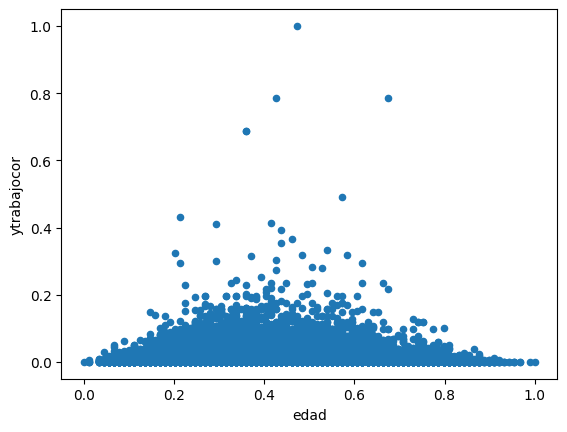

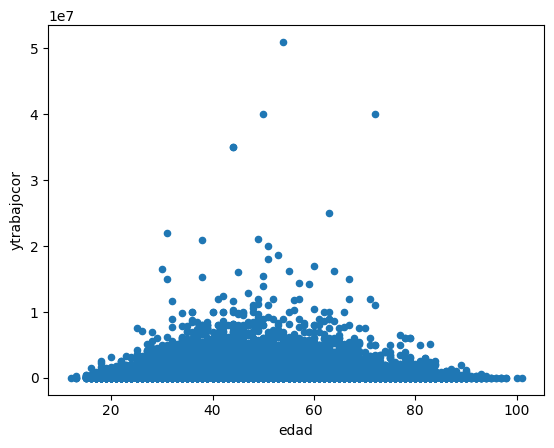

In [13]:
#show a graph of ytrabajocor vs edad, denormalize the data to show the real values, besides the normalized values

import matplotlib.pyplot as plt
data_STATA_cleaned_normalized.plot.scatter(x='edad', y='ytrabajocor')
data_STATA_cleaned.plot.scatter(x='edad', y='ytrabajocor')


In [14]:
#tranform the data to a linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
X = data_STATA_cleaned_normalized.drop(columns='ytrabajocor')
y = data_STATA_cleaned_normalized['ytrabajocor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)


4.35233772936397e-06

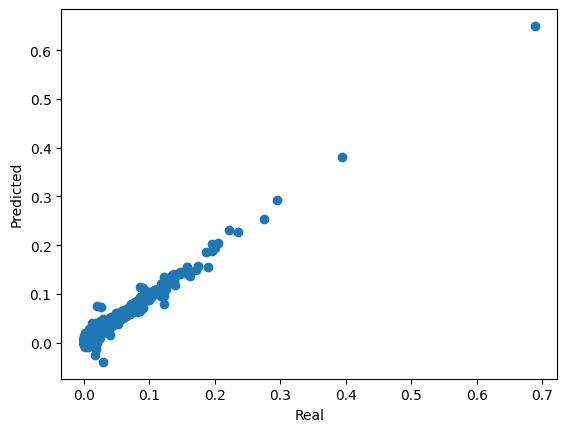

In [15]:
#graph the real vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [16]:
#show the coefficients of the model from higher to lower, to see which variables have more impact
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)
pd.set_option('display.max_rows', None)
coefficients

,Coefficient
id_vivienda,-1.492045e+09
folio,1.492045e+09
id_persona,1.042411e-04
region,-1.476344e-03
area,-6.042793e-05
cod_upm,3.799080e+00
nse,-2.623349e-05
estrato,1.534388e-03
hogar,-2.080932e+01
expr,-1.558841e-03


In [18]:
#create model, use a linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
X = data_STATA_cleaned_normalized.drop('ytrabajocor', axis=1)
y = data_STATA_cleaned_normalized['ytrabajocor']

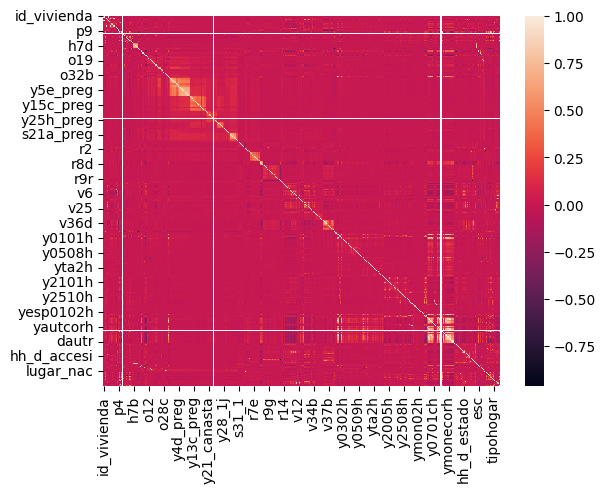

In [19]:
#create a correlation matrix
correlation_matrix = data_STATA_cleaned_normalized.corr()
#make hotmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix)
sns.set(rc={'figure.figsize':(20,20)})